# Modelling a Decision Tree

In [1]:
import numpy as np
from sklearn import tree

### Feature names

In [2]:
with open('../data/feature_names.txt') as f:
    feature_names = [ line.strip() for line in f.readlines() ]

In [3]:
feature_names[:3]

['YEAR_2014', 'YEAR_2015', 'YEAR_2016']

### X and Y

In [4]:
X_train = np.load('../data/X_train.npy')

In [5]:
X_train.shape

(12648, 888)

In [6]:
X_test = np.load('../data/X_test.npy')

In [7]:
X_test.shape

(3163, 888)

In [8]:
y_train = np.load('../data/y_train.npy')

In [9]:
y_train.shape

(12648,)

In [10]:
y_test = np.load('../data/y_test.npy')

In [11]:
y_test.shape

(3163,)

### Modelling

In [12]:
model = tree.DecisionTreeClassifier(random_state=42)

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [14]:
model.score(X_test, y_test)

0.9996838444514701

In [15]:
labels = [name.replace('&', ' ') for name in feature_names ] 

In [16]:
import graphviz 

dot_data = tree.export_graphviz(model,
                                feature_names=labels,
                                filled=True,
                                rounded=True,
                                out_file=None, # out_file='../figures/graph.dot',
                                class_names=['P', 'F'],
                                special_characters=True)

In [17]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<FIRST_RESULT_F &le; 0.5<br/>gini = 0.215<br/>samples = 12648<br/>value = [1547, 11101]<br/>class = F>, fillcolor="#399de5db"] ;\n1 [label=<PASS_M8_N &le; 0.5<br/>gini = 0.006<br/>samples = 11136<br/>value = [35, 11101]<br/>class = F>, fillcolor="#399de5fe"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<CANX_2014.0 &le; 0.5<br/>gini = 0.0<br/>samples = 11101<br/>value = [2, 11099]<br/>class = F>, fillcolor="#399de5ff"] ;\n1 -> 2 ;\n3 [label=<FEB_CANX_LEFT_Y &le; 0.5<br/>gini = 0.0<br/>samples = 11100<br/>value = [1, 11099]<br/>class = F>, fillcolor="#399de5ff"] ;\n2 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 11097<br/>value = [0, 11097]<br/>class = F>, fillcolor="#399de5ff"] ;\n3 -> 4 ;\n5 [label=<AGE_AT_START &le; 18.45<br/>gini = 0.444<br/>samples = 3<br/>value = [1, 2]<br/>class = F>, fillcolor="#399de57f"] ;\n3 -> 5 ;\n

In [18]:
graph = graphviz.Source(dot_data)

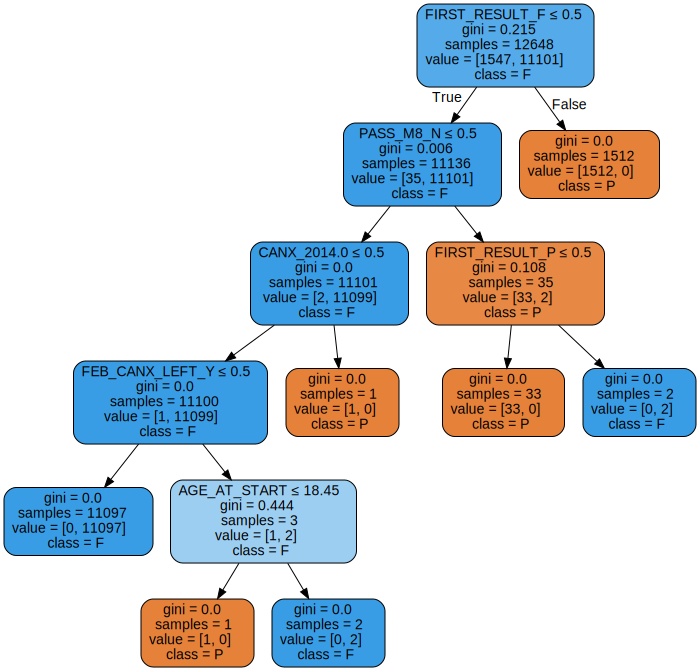

In [19]:
graph

In [20]:
graph.render("../figures/tree.dot") # dot -Tpdf -O figures/graph.dot

'../figures/tree.dot.pdf'